# <center>Ideal Graphene junction resistance</center>
<hr>

In [6]:
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import minimize 
from scipy.interpolate import interp1d
from  matplotlib import pyplot as plt
import matplotlib

%matplotlib notebook

# If you don't have pdflatex installed, remove the update call below.
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'font.size': 14,
#     'toolbar': 'None',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
#     'legend.fancybox': False,
#     'legend.shadow': False,
#     'figure.figsize': (9.5, 5)
# })

### Physical Constants

In [7]:
h_bar = 6.58211899e-16 # reduced Planck constant [eV . s]
h = 2 * np.pi * h_bar
h_SI = 6.62607015e-34 # [m^2 . kg / s]
c = 29979245800e8 # speed of light in [Angstrom / s]
c_cm = c * 1e-8 # speed of light in [cm / s]
mo = 5.685629658548379204e-16 # electron rest mass [eV / (cm/s)^2]
me = 9.1093837015e-31 # electron rest mass [kg]
qel = 1.60219e-19 # elementary charge [C]
angstrom = 1e-8 # [cm]
k_B = 8.617343e-5 # Boltzmann constant [eV / K]
eps_0 = 552635 # [e / (V.cm)]
eps_0_SI = 8.85418782e-14 # [F / cm] 

### Graphene parameters

In [8]:
a = 1.42e-8 # lattice parameter [cm]
t = 2.8 # Hopping energy [eV]
vF = 3 * t * a / (2 * h_bar) # Fermi velocity [cm / s]

### Induced carrier in graphene due to the gate voltage

<IPython.core.display.Javascript object>


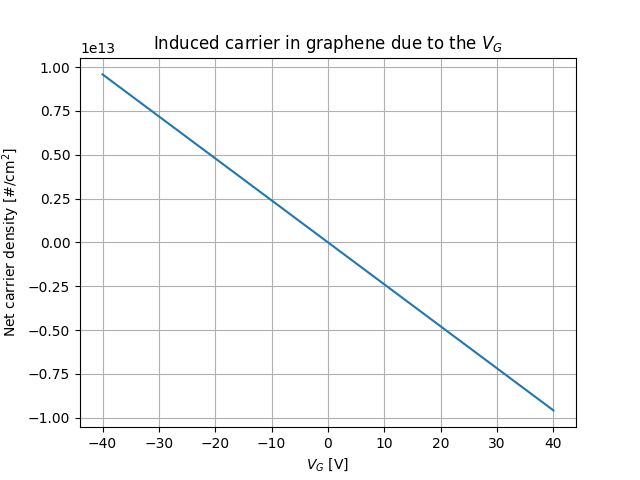

In [20]:
Cq = lambda EF : 2 * EF * 1**2 / (np.pi * h_bar**2 * vF)
Cg = lambda tox : 3.9 * eps_0 / (tox * 1e-7)
n0G = lambda tox, VGD : - Cg(tox) * VGD # 2D charge density [# / cm^2]
nt0Gch = lambda tox, Vg : n0G(tox, Vg) # net carrier density in the graphene channel

x = np.linspace(-40, 40)
plt.figure()
plt.plot(x, nt0Gch(90, x))
plt.title(r'Induced carrier in graphene due to the $V_{G}$')
plt.xlabel(r'$V_{G}$ [V]')
plt.ylabel('Net carrier density [#/cm$^{2}$]')
plt.grid()

### Density of state per unit cell in graphene

<IPython.core.display.Javascript object>


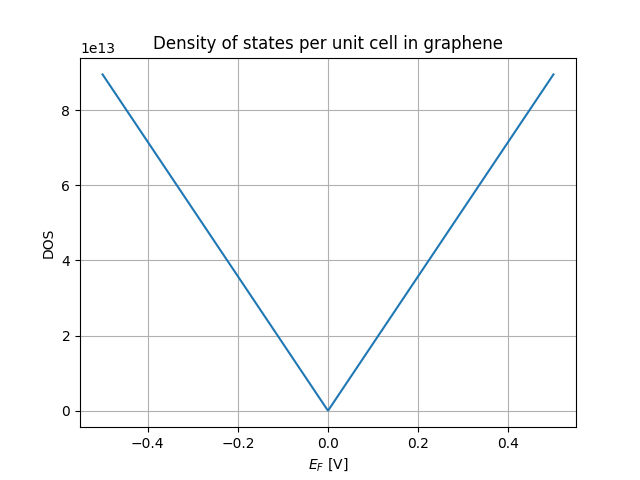

In [22]:
gv = 2 # valley degeneracy 
gs = 2 # spin degeneracy

DOS = lambda x : gv * gs * np.abs(x) / (2 * np.pi * (h_bar * vF)**2) 

x = np.linspace(-0.5, 0.5, 1000)
plt.figure()
plt.plot(x, DOS(x))
plt.title('Density of states per unit cell in graphene')
plt.xlabel(r'$E_{F}$ [V]')
plt.ylabel('DOS')
plt.grid()

### Carrier density in an ideal graphene channel (GC) as a function of Fermi energy

<IPython.core.display.Javascript object>


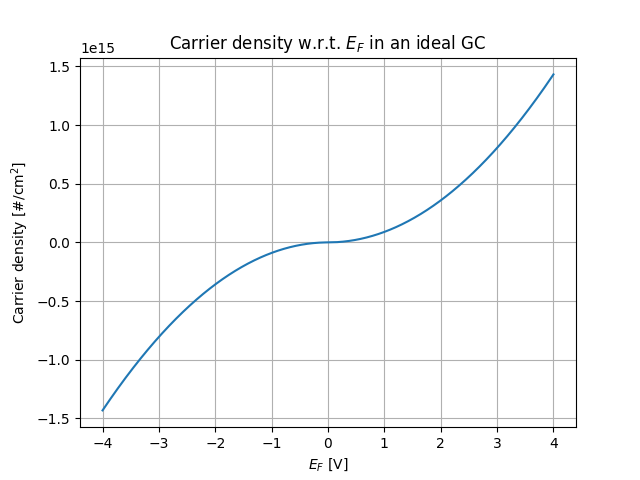

In [25]:
QGC = lambda EF : np.array([integrate.quad(DOS, 0, EF)[0] for EF in EF])

x = np.linspace(-4, 4, 1000)
plt.figure()
plt.plot(x, QGC(x))
plt.title(r'Carrier density w.r.t. $E_{F}$ in an ideal GC')
plt.xlabel(r'$E_{F}$ [V]')
plt.ylabel(r'Carrier density [#/cm$^{2}$]')
plt.grid()

### Fermi Level as a function of gate voltage

<IPython.core.display.Javascript object>


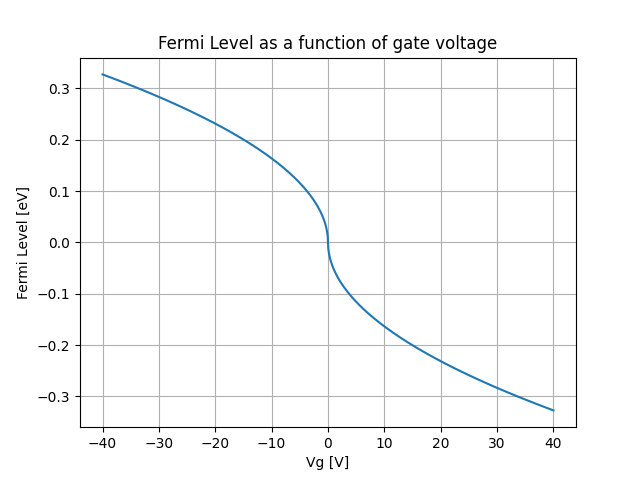

In [26]:
FL_VG = lambda tox, VGD : - VGD * h_bar * vF * np.sqrt(np. pi / 1) * np.sqrt(Cg(tox) * np.abs(VGD)) / np.abs(VGD)

x = np.linspace(-40, 40, 1000)
plt.figure()
plt.plot(x, FL_VG(90, x))
plt.title('Fermi Level as a function of gate voltage')
plt.xlabel('Vg [V]')
plt.ylabel('Fermi Level [eV]')
plt.grid()

### Number of distinct transversal modes in graphene

In [27]:
Mt = lambda tox, W, Vg : np.abs(FL_VG(tox, Vg) * W * 1e-4 / (np.pi * h_bar * vF)) 

### Ideal contact resistance for a graphene channel

<IPython.core.display.Javascript object>


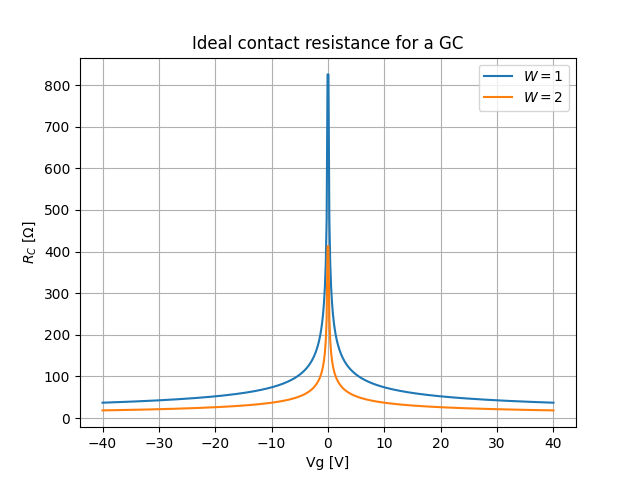

In [49]:
R0c = lambda tox, W, Vg : h / (gv * gs * 1**2 * Mt(tox, W, Vg) * qel)

Vg = np.linspace(-40, 40, 500)
plt.figure()
plt.plot(Vg, R0c(90, 1, Vg), label=f"$W={1}$")
plt.plot(Vg, R0c(90, 2, Vg), label=f"$W={2}$")
plt.title('Ideal contact resistance for a GC')
plt.xlabel('Vg [V]')
plt.ylabel('$R_{C}$ [$\Omega$]')
plt.grid()
plt.legend()
plt.show()

## Ideal Metal-Graphene junction resistance of a (Gaussian) broadened graphene channel

In [30]:
# Gaussian broadening of the DOS

t2 = h_bar * vF * np.sqrt(2 * np.pi * 5e-11) # this isn't equal to .117 [eV]?
t2 = 0.117 # Gaussian broadening of the DOS 

<IPython.core.display.Javascript object>


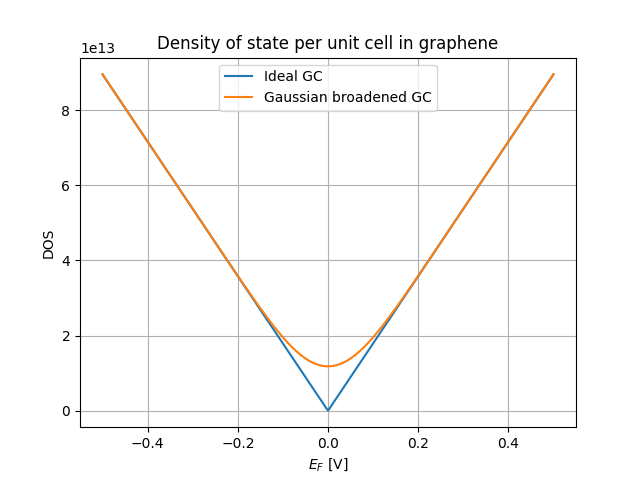

In [39]:
DsGauss = lambda E :  (1 * 2 / (np.pi * (h_bar * vF)**2)) \
                * integrate.quad(lambda Em : np.exp(-(Em - E)**2 / t2**2) * np.abs(Em) / (t2 * np.sqrt(np.pi)), -2, 2)[0]

x = np.linspace(-0.5, 0.5, 1000)
plt.figure()
plt.plot(x, DOS(x), label='Ideal GC')
plt.plot(x, [DsGauss(x) for x in x], label='Gaussian broadened GC')
plt.title('Density of state per unit cell in graphene')
plt.xlabel(r'$E_{F}$ [V]')
plt.ylabel('DOS')
plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


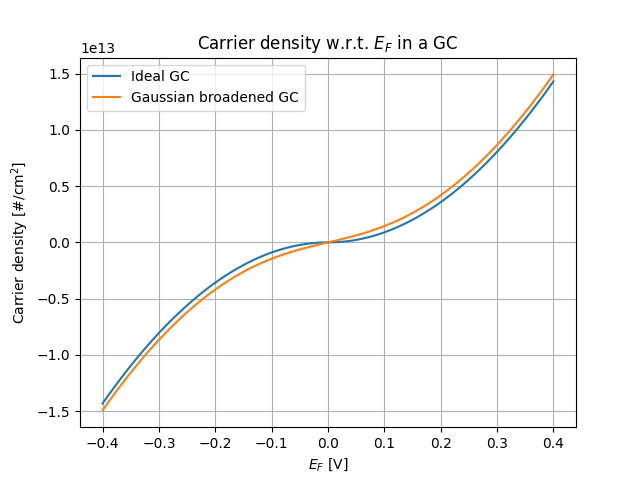

In [80]:
QGG = lambda EF : np.array([integrate.quad(DsGauss, 0, EF)[0] for EF in EF])

x = np.linspace(-0.4, 0.4, 100)
plt.figure()
plt.plot(x, QGC(x), label='Ideal GC')
plt.plot(x, QGG(x), label='Gaussian broadened GC')
plt.title('Carrier density w.r.t. $E_{F}$ in a GC')
plt.xlabel(r'$E_{F}$ [V]')
plt.ylabel('Carrier density [#/cm$^{2}$]')
plt.legend()
plt.grid()

### Fermi Level in a Gaussian broadened graphene channel as a function of gate voltage

In [43]:
toxch = 90
tx = toxch + 0.1

def get_DEFGCG(Vgd_max, n=40):
    
    V = np.linspace(-Vgd_max, Vgd_max, n)
    Ef = np.zeros((n,))
    
    for idx, x in enumerate(V):
        
        guess = FL_VG(toxch, x)
        Ef[idx] = minimize(lambda Ef : np.abs(QGG(Ef) + (Cg(toxch) * x)), guess).x
    
    return interp1d(V, Ef)


DEFGCG = get_DEFGCG(40)

<IPython.core.display.Javascript object>


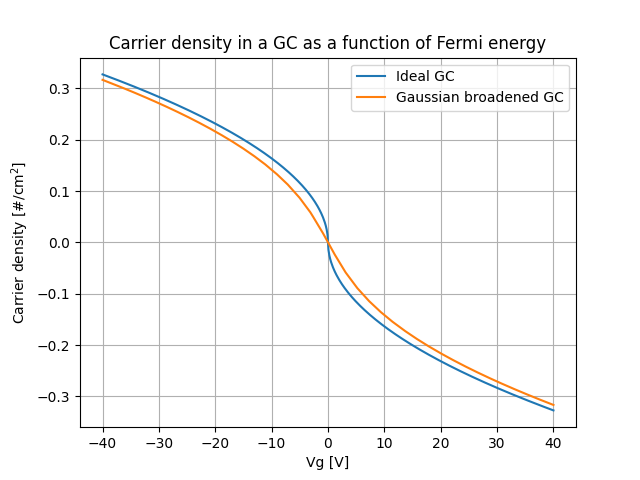

In [59]:
x = np.linspace(-40, 40, 500)

plt.figure()
plt.plot(x, FL_VG(toxch, x), label="Ideal GC")
plt.plot(x, DEFGCG(x), label="Gaussian broadened GC")
plt.title('Carrier density in a GC as a function of Fermi energy')
plt.xlabel('Vg [V]')
plt.ylabel(r'Carrier density [#/cm$^{2}$]')
plt.grid()
plt.legend()
plt.show()

### Conduction Modes in the Gaussian broadened graphene channel as a function of gate voltage


In [70]:
Vg = np.linspace(-40, 40, 500)

MtG = lambda Vgs: integrate.quad(lambda Em : (np.exp(-(Em - DEFGCG(Vgs))**2 / t2**2) / (t2 * np.sqrt(np.pi)) \
                               * np.ceil( np.abs(Em) * 1e-4 / (np.pi * h_bar * vF))), -10, 10)[0]


MtGrCh = lambda Vgs, W : MtG(Vgs) * W

MtGrCh1 = np.asarray([MtGrCh(Vg, 1) for Vg in Vg])
MtGrCh2 = np.asarray([MtGrCh(Vg, 2) for Vg in Vg])

C:\Users\simon\AppData\Local\Temp\ipykernel_9424\4043573782.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  MtG = lambda Vgs: integrate.quad(lambda Em : (np.exp(-(Em - DEFGCG(Vgs))**2 / t2**2) / (t2 * np.sqrt(np.pi)) \


<IPython.core.display.Javascript object>


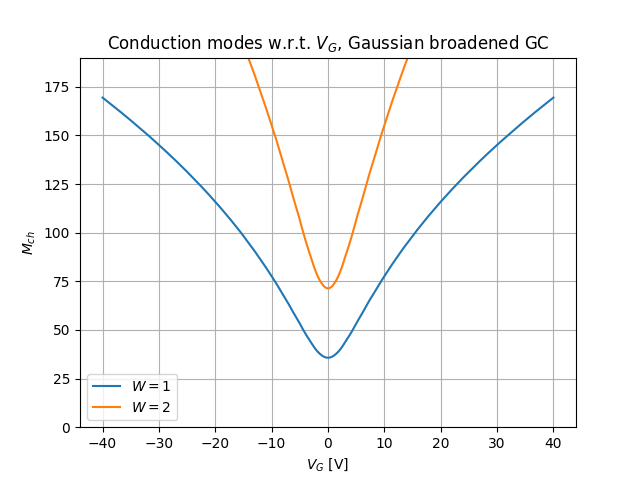

In [71]:
plt.figure()
plt.plot(Vg, MtGrCh1, label=r'$W=1$')
plt.plot(Vg, MtGrCh2, label=r'$W=2$')
plt.title('Conduction modes w.r.t. $V_{G}$, Gaussian broadened GC')
plt.xlabel(r'$V_{G}$ [V]')
plt.ylabel(r'$M_{ch}$')
plt.ylim([0, 190])
plt.legend()
plt.grid()

### Contact Resistance in an ideal metal–graphene junction

In [72]:
RctGF = lambda Vgs, W : h / (2 * 2 * 1**2 * MtGrCh(Vgs, W) * qel) # Contact Resistance in an ideal metal–graphene junction

RctGF1 = h / (2 * 2 * 1**2 * MtGrCh1 * qel) # Contact resistance, ideal junction, contact width 1 micron
RctGF2 = h / (2 * 2 * 1**2 * MtGrCh2 * qel) # contact width 2 microns

<IPython.core.display.Javascript object>


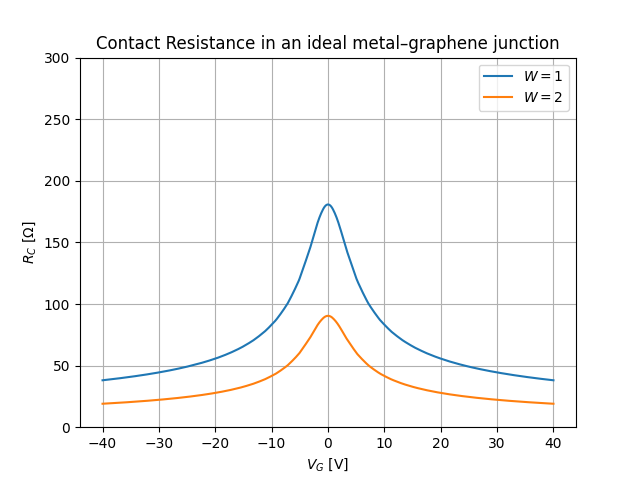

In [74]:
plt.figure()
plt.plot(Vg, RctGF1, label=f"$W={1}$")
plt.plot(Vg, RctGF2, label=f"$W={2}$")
plt.title('Contact Resistance in an ideal metal–graphene junction')
plt.xlabel(r'$V_{G}$ [V]')
plt.ylabel(r'$R_{C}$ [$\Omega$]')
plt.ylim([0, 300])
plt.grid()
plt.legend()
plt.show()

# Classic transport
Simulation of graphene transistors with the width and length of several microns. The scattering effects are significant as the mean free path of carriers is smaller than the graphene channel length.

In [75]:
n_chi = t2**2 / (np.pi * (h_bar * vF)**2) # [carriers cm2] - in the limit of Delta/kBT >> 1

dVD = (1 * n_chi) / Cg(toxch) # Dirac-Voltage variation - [V] (~3.6 V para 300n )

no = n_chi / 2;
po = n_chi / 2;

print(f"Residual spatial charge (electrons + holes -density) -> nχ = {n_chi} [carriers/cm2]")
print(f"Residual spatial charge (electrons density)-> no = {no} [carriers/cm2]")
print(f"Dirac-Voltage variation -> ΔVD = {dVD} V")

Residual spatial charge (electrons + holes -density) -> nχ = 1225029596304.0466 [carriers/cm2]
Residual spatial charge (electrons density)-> no = 612514798152.0233 [carriers/cm2]
Dirac-Voltage variation -> ΔVD = 5.115476537110863 V


### Induced electrons density in the graphene channel due to the gate voltage

In [76]:
ng = lambda Vg : Cg(toxch) * (Vg) # 2D charge density  [electrons . cm-2]

### Thermally generated carriers

In [77]:
nth = lambda T : 2 * np.pi * (k_B * T / (h_bar * vF))**2 / 6

print(f"Thermally generated carriers -> nth = {nth(300)} [carriers/cm2]")

Thermally generated carriers -> nth = 196762629278.83 [carriers/cm2]


### Carrier density in graphene at Dirac point underthermal equilibrium [Nano-CMOS and Post-CMOSElectronics, IET (2016), pag. 103]

In [78]:
nDirac = lambda T : np.sqrt(no**2 + nth(T)**2)

print(f"Carrier density in graphene at Dirac-point ->nDirac = {nDirac(300):.5e} [carrier/cm2]")

Carrier density in graphene at Dirac-point ->nDirac = 6.43343e+11 [carrier/cm2]


### Total density of electrons and holes [Nano-CMOS and Post-CMOS Electronics PRB, (2009)]

Total density of electrons -> ne = 321671381317.92676 [e/cm2]
Total density of holes -> ph = 321671381317.92676 [h/cm2]
Total carriers density -> neh = 643342762635.8535 [h/cm2]


<IPython.core.display.Javascript object>


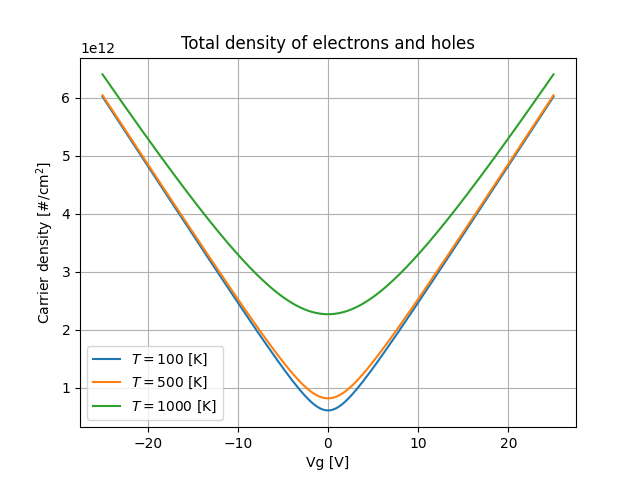

In [84]:
ne = lambda Vgate, T : .5 * (-ng(Vgate) + np.sqrt(ng(Vgate)**2 + nDirac(T)**2))
ph = lambda Vgate, T : .5 * (ng(Vgate) + np.sqrt(ng(Vgate)**2 + nDirac(T)**2))

neh = lambda Vgate, T : ne(Vgate, T) + ph(Vgate, T)

print(f"Total density of electrons -> ne = {ne(0, 300)} [e/cm2]")
print(f"Total density of holes -> ph = {ph(0, 300)} [h/cm2]")
print(f"Total carriers density -> neh = {neh(0, 300)} [h/cm2]")

x = np.linspace(-25, 25, 500)
plt.figure()
plt.plot(x, neh(x, 100), label=f"$T={100}$ [K]")
plt.plot(x, neh(x, 500), label=f"$T={500}$ [K]")
plt.plot(x, neh(x, 1000), label=f"$T={1000}$ [K]")
plt.title('Total density of electrons and holes')
plt.xlabel('Vg [V]')
plt.ylabel(r'Carrier density [#/cm$^{2}$]')
plt.grid()
plt.legend()
plt.show()

## Resistance - Graphene channel
### Mobility in graphene on SiO2

- Phonon scattering - Acoustic phonon -Optical phonon - Surface polar phonons μo = 29.000 cm2/V.s lattice vibrations are an intrinsic source of electron–phonon scattering and dominate the extrinsic scattering mechanisms at finite temperature and limit the carrier mobility in graphene
- Long-range scattering Coulomb - because of trapped charges in the graphenesubstrate interface - degradation of the mobility, shift of Dirac point, and increase in the minimum conductivity plateau width
- Lattice imperfections, edge roughness, and point defects are intrinsic sources of shortrange scattering in graphene sheets

In [85]:
mu_0 = 4650 # [cm^2 / (V . s)] # experimental parameter
nref = 1.1e13 # [cm-3]
Tref = 300 # [K]
alpha_mu = 2.2
beta_mu = 3.0

In [86]:
mu_sio2 = lambda n, T : mu_0 / ((1 + (n / nref)**(alpha_mu)) * (1 + (T/Tref - 1)**(beta_mu)))

### Saturation Velocity [Appl. Phys. Lett. 97, 082112 (2010)/Nano-CMOS and Post-CMOS Electronics, IET (2016), pag. 109]

$\omega_{opm} = \frac{0.081}{hbar}$

In [87]:
w_opm = 0.081 / h_bar
print(w_opm)
N_opm = lambda T : 1 / (np.exp((h_bar * w_opm) / (k_B * T)) - 1) # phonon occupation

print(N_opm(300))
print(neh(0, 300))
print(vF**2)
vsat = lambda Vgate, T : (2 / np.pi) * (w_opm / np.sqrt(np.pi * neh(Vgate, T))) * np.sqrt(1 - (w_opm**2 / (4 * np.pi * neh(Vgate, T) * vF**2))) / (1 + N_opm(T))

print(vsat(0, 300))


123060674112790.53
0.04556292565803286
643342762635.8535
8210012367846236.0
46303763.604626805


In [88]:
gamma = 2

Vdrif = lambda Vgate, Vd, L, T, x : mu_sio2(neh(Vgate, T), T) * (Vd / L) / \
        (1 + ( mu_sio2(neh(Vgate, T), T) * Vd / (vsat(Vgate, T) * L) )**gamma)**(1/gamma)

### Current ($I_{DS}$) in the graphene channel (charge-collection model) 

In [89]:
Ids = lambda Vgate, Vd, T, W, L : qel * (W / L) * \
        integrate.quad(lambda x : neh(Vgate, T) * Vdrif(Vgate, Vd, L, T, x), 0, L)[0]

print(f'Current in the graphene channel Ids = {Ids(25, 1, 300, 10e-4, 10e-4)} [A]')

Current in the graphene channel Ids = 0.0034646765780108326 [A]


<IPython.core.display.Javascript object>


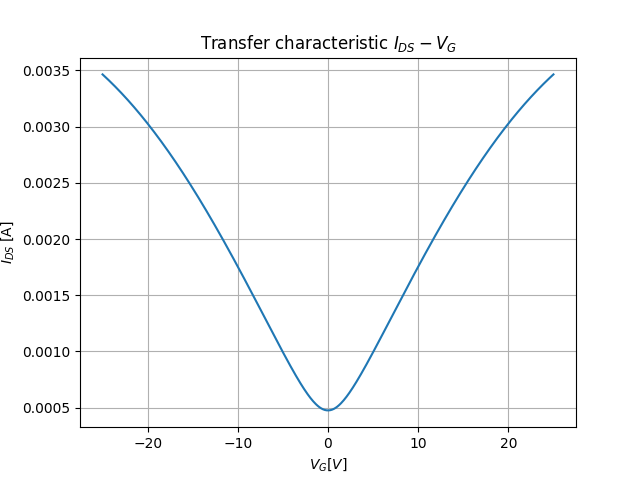

In [116]:
Vgate = np.linspace(-25, 25, 500)
plt.figure()
plt.plot(Vgate, [Ids(Vg, 1, 300, 10e-4, 10e-4) for Vg in Vgate])
plt.title('Transfer characteristic $I_{DS}-V_{G}$')
plt.xlabel('$V_{G} [V]$')
plt.ylabel('$I_{DS}$ [A]')
plt.grid()

In [97]:
RGr = lambda Vgate, Vd, T, W, L : Vd / Ids(Vgate, Vd, T, W, L) # Ohms

<IPython.core.display.Javascript object>


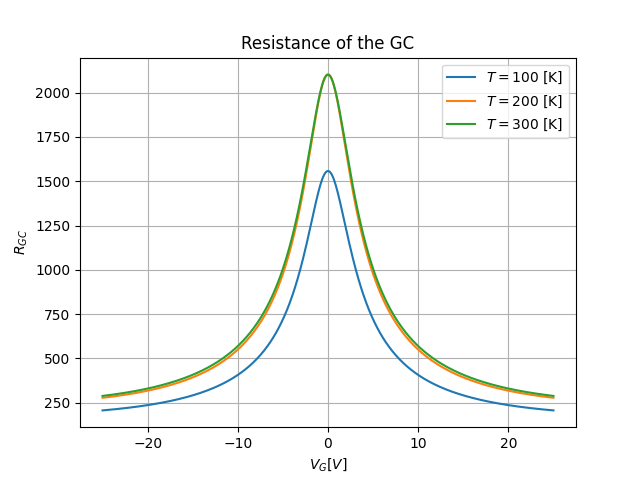

In [115]:
Vgate = np.linspace(-25, 25, 500)
plt.figure()
plt.plot(Vgate, [RGr(Vg, 1, 100, 10e-4, 10e-4) for Vg in Vgate], label=r'$T=100$ [K]')
plt.plot(Vgate, [RGr(Vg, 1, 200, 10e-4, 10e-4) for Vg in Vgate], label=r'$T=200$ [K]')
plt.plot(Vgate, [RGr(Vg, 1, 300, 10e-4, 10e-4) for Vg in Vgate], label=r'$T=300$ [K]')
plt.title('Resistance of the GC')
plt.xlabel(r'$V_{G} [V]$')
plt.ylabel(r'$R_{GC}$')
plt.grid()
plt.legend()

### Device - Resistance of the graphene channel + Contact Resistance (ideal metal - graphene junction)

In [109]:
RDT = lambda Vgate, Vd, T, W, L : RGr(Vgate, Vd, T, W, L) + RctGF(Vgate, W) # Device - Total resistance Ohms

In [110]:
# Device geometry

L = 1
W = 1

Vgate = np.linspace(-25, 25, 500)

RDT0 = [RDT(Vg, 1, 100, W, L) for Vg in Vgate]
RDT1 = [RDT(Vg, 1, 200, W, L) for Vg in Vgate]
RDT2 = [RDT(Vg, 1, 300, W, L) for Vg in Vgate]

C:\Users\simon\AppData\Local\Temp\ipykernel_9424\4043573782.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  MtG = lambda Vgs: integrate.quad(lambda Em : (np.exp(-(Em - DEFGCG(Vgs))**2 / t2**2) / (t2 * np.sqrt(np.pi)) \


<IPython.core.display.Javascript object>


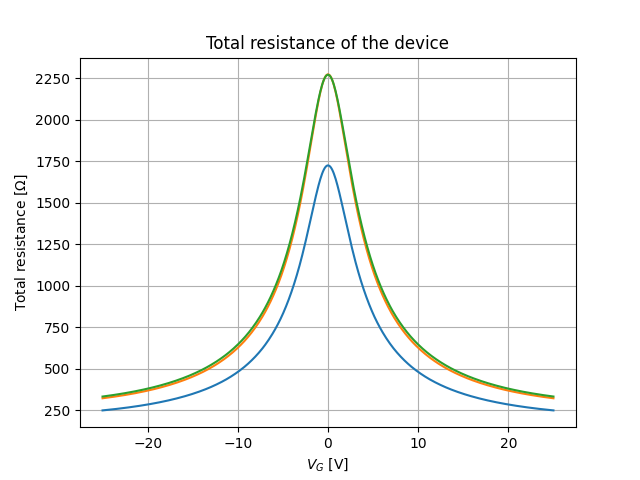

In [118]:
plt.figure()
plt.plot(Vgate, RDT0, label=r'$T=100$ [K]')
plt.plot(Vgate, RDT1, label=r'$T=200$ [K]')
plt.plot(Vgate, RDT2, label=r'$T=300$ [K]')
plt.title('Total resistance of the device')
plt.xlabel(r'$V_{G}$ [V]')
plt.ylabel(r'Total resistance [$\Omega$]')
plt.grid()

### Device - Total current (Ids) charge-collection model 

In [113]:
IDT = lambda Vg, Vd, T, W, L : Vd / RDT(Vgate, Vd, T, W, L) # Device total current [Amps]

Vd = 1

IDT0 = Vd / np.asarray(RDT0)
IDT1 = Vd / np.asarray(RDT1)
IDT2 = Vd / np.asarray(RDT2)

<IPython.core.display.Javascript object>


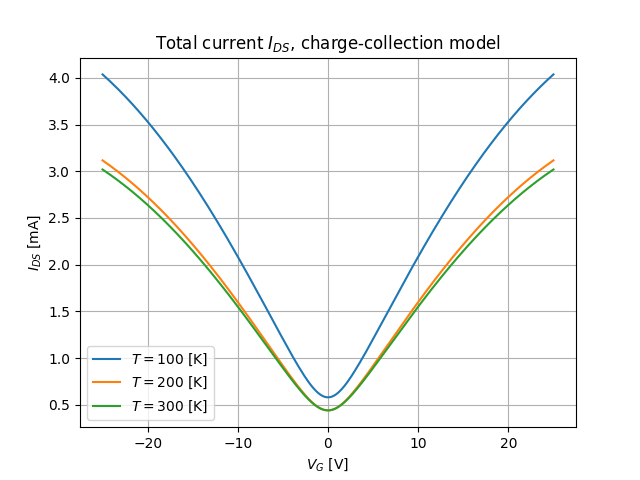

In [119]:
plt.figure()
plt.plot(Vgate, IDT0*1e3, label=r'$T=100$ [K]')
plt.plot(Vgate, IDT1*1e3, label=r'$T=200$ [K]')
plt.plot(Vgate, IDT2*1e3, label=r'$T=300$ [K]')
plt.title(r'Total current $I_{DS}$, charge-collection model')
plt.xlabel(r'$V_{G}$ [V]')
plt.ylabel(r'$I_{DS}$ [mA]')
plt.legend()
plt.grid()